In [1]:
from pathlib import Path
import os
import pandas as pd
from matplotlib import pyplot as plt

from tools.add_AR_cols import add_AR_cols
from data_treatment.box_creator import create_binary_box
import TinyAutoML as tam

if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()

os.chdir(root)

Here we import the whole cleaned dataset. It is 166 columns for 3692 rows.
We add Auto-lagged cols and the binary target

In [2]:
df = pd.read_csv('database.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = create_binary_box(df, relative_threshold = 0.05, box_length=5).set_index(['Date']).dropna(axis = 0)
df = add_AR_cols(df,7).dropna(axis = 0)
X,y = df.drop('Box', axis=1), df['Box']

cut = int(len(y) * 0.8)

X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

Then we instantiate the MetaPipeline object, we fit it and look at the outputs and scores.



In [3]:
mpipe = tam.Estimator.MetaPipeline()
mpipe.fit(X_train,y_train, grid_search=True)

Correcting non-stationarity on the dataset...
Done.
Calculating columns to keep according to LASSO features selection


100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

	Done.
Training models
Training : 
----> rcf


----> Logistic Regression
----> Gaussian Naive Bayes
----> LDA
	Done.
Results : 
The best estimator is LDA with a cross-validation accuracy (in Sample) of 0.6825578695642079


MetaPipeline()

In [4]:
mpipe.classification_report(X_test,y_test)

Correcting non-stationarity on the dataset...
Done.
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       386
           1       0.73      0.62      0.67       336

    accuracy                           0.72       722
   macro avg       0.72      0.71      0.71       722
weighted avg       0.72      0.72      0.71       722



Correcting non-stationarity on the dataset...
Done.


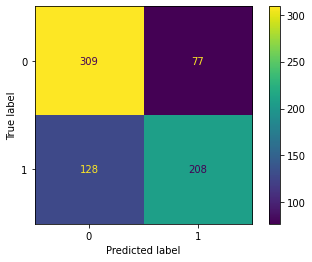

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test[17:],mpipe.predict(X_test))

In [6]:
y_scores= mpipe.decision_function(X_test)
fpr, tpr, thresholds = mpipe(y_test, y_scores)




def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--')
    return

plot_roc_curve(fpr, tpr)
plt.show()

AttributeError: 'MetaPipeline' object has no attribute 'decision_function'